In [1]:
import gym
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Prepare functions

In [2]:
def instanciate_Q(env):
    state_space = [x for x in range(env.observation_space.n)]
    state_key = [1 for x in range(env.observation_space.n)]
    state_space_pd = pd.DataFrame({'key': state_key,'state':state_space})

    action_space = [x for x in range(env.action_space.n)]
    action_key = [1 for x in range(env.action_space.n)]
    action_space_pd = pd.DataFrame({'key':action_key, 'action':action_space})

    Q = pd.merge(state_space_pd, action_space_pd, on='key') #get a cartesian product between actions and states
    Q["q_value"]=0 #instanciate 
    
    return Q

In [3]:
def epsilon_greedy_policy(Q, epsilon, env, observation):
    random_action = np.random.choice((0, 1), p=[epsilon, (1 - epsilon)])
    if random_action == 0:
        chosen_action = env.action_space.sample()
    else:
        select_current_state = (Q["state"] == observation)
        q_values = Q[select_current_state]["q_value"]
        value_max = np.max(q_values)

        select_max_reward = (Q["q_value"] == value_max)

        chosen_action = np.random.choice(Q[select_current_state & select_max_reward]["action"])

    return chosen_action

In [4]:
def Q_learning(Q, alpha, observation, reward, chosen_action, observation_next, lambda_=0.9):
    
    # make filters
    select_current_state = (Q["state"] == observation)
    select_next_state = (Q["state"] == observation_next)
    select_chosen_action = (Q["action"] == chosen_action)
    
    # compute the target
    target = reward + lambda_*np.max(Q.loc[select_next_state, "q_value"])
    former_Q_value = Q.loc[select_current_state&select_chosen_action,"q_value"]
    
    # update the q_value for the action and current observation
    new_Q_value = (1 - alpha)*former_Q_value + alpha*target
    Q.loc[select_current_state & select_chosen_action,"q_value"] = new_Q_value

    return Q

# Set the parameters

In [5]:
##########
# Params #
##########
epsilon = 0.9
alpha=0.2
lambda_ = 0.9

#######
# Env #
#######

env_name = "FrozenLake-v0"
env = gym.make(env_name)
observation = env.reset()

##################
# Instanciations #
##################

Q = instanciate_Q(env)

resultats = pd.DataFrame(columns=['episode','step','done','reward','observation'])

# Train the algorithm

In [6]:
nb_episode = 10000

# Boucle d’apprentissage (exploration mode)
for episode in range(nb_episode):
    if epsilon > 0.1:
        epsilon -= 0.001
    
    done = False
    step=0
    observation = env.reset()
    while not done:
        
        # Renvoyer une sortie
        # env.render() 
        
        # Choisir une action avec une politique epsilon_greedy
        action = epsilon_greedy_policy(Q, epsilon, env, observation)
        
        # L'envoyer à l'environnement et récupérer la réponse
        observation_next, reward, done, info = env.step(action)
        
        # Ajustemen de la fonction de reward
        if reward==1:
            reward=100
        
        # Apprendre de cette experience
        Q = Q_learning(Q, alpha, observation, reward, action, observation_next, lambda_)
        
        # Enregistrer les résultats
        resultats = resultats.append({'episode': episode,
                                      'step' : step,
                                      'done' : done,
                                      'reward' : reward,
                                      'observation':observation}, ignore_index=True)
        
        # Increase step
        step +=1
        observation = observation_next
        
    print("Episode : {} --> reward : {}".format(episode, done))

env.close()

Episode : 0 --> done : True
Episode : 1 --> done : True
Episode : 2 --> done : True
Episode : 3 --> done : True
Episode : 4 --> done : True
Episode : 5 --> done : True
Episode : 6 --> done : True
Episode : 7 --> done : True
Episode : 8 --> done : True
Episode : 9 --> done : True
Episode : 10 --> done : True
Episode : 11 --> done : True
Episode : 12 --> done : True
Episode : 13 --> done : True
Episode : 14 --> done : True
Episode : 15 --> done : True
Episode : 16 --> done : True
Episode : 17 --> done : True
Episode : 18 --> done : True
Episode : 19 --> done : True
Episode : 20 --> done : True
Episode : 21 --> done : True
Episode : 22 --> done : True
Episode : 23 --> done : True
Episode : 24 --> done : True
Episode : 25 --> done : True
Episode : 26 --> done : True
Episode : 27 --> done : True
Episode : 28 --> done : True
Episode : 29 --> done : True
Episode : 30 --> done : True
Episode : 31 --> done : True
Episode : 32 --> done : True
Episode : 33 --> done : True
Episode : 34 --> done : 

Episode : 279 --> done : True
Episode : 280 --> done : True
Episode : 281 --> done : True
Episode : 282 --> done : True
Episode : 283 --> done : True
Episode : 284 --> done : True
Episode : 285 --> done : True
Episode : 286 --> done : True
Episode : 287 --> done : True
Episode : 288 --> done : True
Episode : 289 --> done : True
Episode : 290 --> done : True
Episode : 291 --> done : True
Episode : 292 --> done : True
Episode : 293 --> done : True
Episode : 294 --> done : True
Episode : 295 --> done : True
Episode : 296 --> done : True
Episode : 297 --> done : True
Episode : 298 --> done : True
Episode : 299 --> done : True
Episode : 300 --> done : True
Episode : 301 --> done : True
Episode : 302 --> done : True
Episode : 303 --> done : True
Episode : 304 --> done : True
Episode : 305 --> done : True
Episode : 306 --> done : True
Episode : 307 --> done : True
Episode : 308 --> done : True
Episode : 309 --> done : True
Episode : 310 --> done : True
Episode : 311 --> done : True
Episode : 

Episode : 553 --> done : True
Episode : 554 --> done : True
Episode : 555 --> done : True
Episode : 556 --> done : True
Episode : 557 --> done : True
Episode : 558 --> done : True
Episode : 559 --> done : True
Episode : 560 --> done : True
Episode : 561 --> done : True
Episode : 562 --> done : True
Episode : 563 --> done : True
Episode : 564 --> done : True
Episode : 565 --> done : True
Episode : 566 --> done : True
Episode : 567 --> done : True
Episode : 568 --> done : True
Episode : 569 --> done : True
Episode : 570 --> done : True
Episode : 571 --> done : True
Episode : 572 --> done : True
Episode : 573 --> done : True
Episode : 574 --> done : True
Episode : 575 --> done : True
Episode : 576 --> done : True
Episode : 577 --> done : True
Episode : 578 --> done : True
Episode : 579 --> done : True
Episode : 580 --> done : True
Episode : 581 --> done : True
Episode : 582 --> done : True
Episode : 583 --> done : True
Episode : 584 --> done : True
Episode : 585 --> done : True
Episode : 

Episode : 828 --> done : True
Episode : 829 --> done : True
Episode : 830 --> done : True
Episode : 831 --> done : True
Episode : 832 --> done : True
Episode : 833 --> done : True
Episode : 834 --> done : True
Episode : 835 --> done : True
Episode : 836 --> done : True
Episode : 837 --> done : True
Episode : 838 --> done : True
Episode : 839 --> done : True
Episode : 840 --> done : True
Episode : 841 --> done : True
Episode : 842 --> done : True
Episode : 843 --> done : True
Episode : 844 --> done : True
Episode : 845 --> done : True
Episode : 846 --> done : True
Episode : 847 --> done : True
Episode : 848 --> done : True
Episode : 849 --> done : True
Episode : 850 --> done : True
Episode : 851 --> done : True
Episode : 852 --> done : True
Episode : 853 --> done : True
Episode : 854 --> done : True
Episode : 855 --> done : True
Episode : 856 --> done : True
Episode : 857 --> done : True
Episode : 858 --> done : True
Episode : 859 --> done : True
Episode : 860 --> done : True
Episode : 

Episode : 1098 --> done : True
Episode : 1099 --> done : True
Episode : 1100 --> done : True
Episode : 1101 --> done : True
Episode : 1102 --> done : True
Episode : 1103 --> done : True
Episode : 1104 --> done : True
Episode : 1105 --> done : True
Episode : 1106 --> done : True
Episode : 1107 --> done : True
Episode : 1108 --> done : True
Episode : 1109 --> done : True
Episode : 1110 --> done : True
Episode : 1111 --> done : True
Episode : 1112 --> done : True
Episode : 1113 --> done : True
Episode : 1114 --> done : True
Episode : 1115 --> done : True
Episode : 1116 --> done : True
Episode : 1117 --> done : True
Episode : 1118 --> done : True
Episode : 1119 --> done : True
Episode : 1120 --> done : True
Episode : 1121 --> done : True
Episode : 1122 --> done : True
Episode : 1123 --> done : True
Episode : 1124 --> done : True
Episode : 1125 --> done : True
Episode : 1126 --> done : True
Episode : 1127 --> done : True
Episode : 1128 --> done : True
Episode : 1129 --> done : True
Episode 

Episode : 1365 --> done : True
Episode : 1366 --> done : True
Episode : 1367 --> done : True
Episode : 1368 --> done : True
Episode : 1369 --> done : True
Episode : 1370 --> done : True
Episode : 1371 --> done : True
Episode : 1372 --> done : True
Episode : 1373 --> done : True
Episode : 1374 --> done : True
Episode : 1375 --> done : True
Episode : 1376 --> done : True
Episode : 1377 --> done : True
Episode : 1378 --> done : True
Episode : 1379 --> done : True
Episode : 1380 --> done : True
Episode : 1381 --> done : True
Episode : 1382 --> done : True
Episode : 1383 --> done : True
Episode : 1384 --> done : True
Episode : 1385 --> done : True
Episode : 1386 --> done : True
Episode : 1387 --> done : True
Episode : 1388 --> done : True
Episode : 1389 --> done : True
Episode : 1390 --> done : True
Episode : 1391 --> done : True
Episode : 1392 --> done : True
Episode : 1393 --> done : True
Episode : 1394 --> done : True
Episode : 1395 --> done : True
Episode : 1396 --> done : True
Episode 

Episode : 1632 --> done : True
Episode : 1633 --> done : True
Episode : 1634 --> done : True
Episode : 1635 --> done : True
Episode : 1636 --> done : True
Episode : 1637 --> done : True
Episode : 1638 --> done : True
Episode : 1639 --> done : True
Episode : 1640 --> done : True
Episode : 1641 --> done : True
Episode : 1642 --> done : True
Episode : 1643 --> done : True
Episode : 1644 --> done : True
Episode : 1645 --> done : True
Episode : 1646 --> done : True
Episode : 1647 --> done : True
Episode : 1648 --> done : True
Episode : 1649 --> done : True
Episode : 1650 --> done : True
Episode : 1651 --> done : True
Episode : 1652 --> done : True
Episode : 1653 --> done : True
Episode : 1654 --> done : True
Episode : 1655 --> done : True
Episode : 1656 --> done : True
Episode : 1657 --> done : True
Episode : 1658 --> done : True
Episode : 1659 --> done : True
Episode : 1660 --> done : True
Episode : 1661 --> done : True
Episode : 1662 --> done : True
Episode : 1663 --> done : True
Episode 

Episode : 1898 --> done : True
Episode : 1899 --> done : True
Episode : 1900 --> done : True
Episode : 1901 --> done : True
Episode : 1902 --> done : True
Episode : 1903 --> done : True
Episode : 1904 --> done : True
Episode : 1905 --> done : True
Episode : 1906 --> done : True
Episode : 1907 --> done : True
Episode : 1908 --> done : True
Episode : 1909 --> done : True
Episode : 1910 --> done : True
Episode : 1911 --> done : True
Episode : 1912 --> done : True
Episode : 1913 --> done : True
Episode : 1914 --> done : True
Episode : 1915 --> done : True
Episode : 1916 --> done : True
Episode : 1917 --> done : True
Episode : 1918 --> done : True
Episode : 1919 --> done : True
Episode : 1920 --> done : True
Episode : 1921 --> done : True
Episode : 1922 --> done : True
Episode : 1923 --> done : True
Episode : 1924 --> done : True
Episode : 1925 --> done : True
Episode : 1926 --> done : True
Episode : 1927 --> done : True
Episode : 1928 --> done : True
Episode : 1929 --> done : True
Episode 

Episode : 2163 --> done : True
Episode : 2164 --> done : True
Episode : 2165 --> done : True
Episode : 2166 --> done : True
Episode : 2167 --> done : True
Episode : 2168 --> done : True
Episode : 2169 --> done : True
Episode : 2170 --> done : True
Episode : 2171 --> done : True
Episode : 2172 --> done : True
Episode : 2173 --> done : True
Episode : 2174 --> done : True
Episode : 2175 --> done : True
Episode : 2176 --> done : True
Episode : 2177 --> done : True
Episode : 2178 --> done : True
Episode : 2179 --> done : True
Episode : 2180 --> done : True
Episode : 2181 --> done : True
Episode : 2182 --> done : True
Episode : 2183 --> done : True
Episode : 2184 --> done : True
Episode : 2185 --> done : True
Episode : 2186 --> done : True
Episode : 2187 --> done : True
Episode : 2188 --> done : True
Episode : 2189 --> done : True
Episode : 2190 --> done : True
Episode : 2191 --> done : True
Episode : 2192 --> done : True
Episode : 2193 --> done : True
Episode : 2194 --> done : True
Episode 

Episode : 2429 --> done : True
Episode : 2430 --> done : True
Episode : 2431 --> done : True
Episode : 2432 --> done : True
Episode : 2433 --> done : True
Episode : 2434 --> done : True
Episode : 2435 --> done : True
Episode : 2436 --> done : True
Episode : 2437 --> done : True
Episode : 2438 --> done : True
Episode : 2439 --> done : True
Episode : 2440 --> done : True
Episode : 2441 --> done : True
Episode : 2442 --> done : True
Episode : 2443 --> done : True
Episode : 2444 --> done : True
Episode : 2445 --> done : True
Episode : 2446 --> done : True
Episode : 2447 --> done : True
Episode : 2448 --> done : True
Episode : 2449 --> done : True
Episode : 2450 --> done : True
Episode : 2451 --> done : True
Episode : 2452 --> done : True
Episode : 2453 --> done : True
Episode : 2454 --> done : True
Episode : 2455 --> done : True
Episode : 2456 --> done : True
Episode : 2457 --> done : True
Episode : 2458 --> done : True
Episode : 2459 --> done : True
Episode : 2460 --> done : True
Episode 

Episode : 2695 --> done : True
Episode : 2696 --> done : True
Episode : 2697 --> done : True
Episode : 2698 --> done : True
Episode : 2699 --> done : True
Episode : 2700 --> done : True
Episode : 2701 --> done : True
Episode : 2702 --> done : True
Episode : 2703 --> done : True
Episode : 2704 --> done : True
Episode : 2705 --> done : True
Episode : 2706 --> done : True
Episode : 2707 --> done : True
Episode : 2708 --> done : True
Episode : 2709 --> done : True
Episode : 2710 --> done : True
Episode : 2711 --> done : True
Episode : 2712 --> done : True
Episode : 2713 --> done : True
Episode : 2714 --> done : True
Episode : 2715 --> done : True
Episode : 2716 --> done : True
Episode : 2717 --> done : True
Episode : 2718 --> done : True
Episode : 2719 --> done : True
Episode : 2720 --> done : True
Episode : 2721 --> done : True
Episode : 2722 --> done : True
Episode : 2723 --> done : True
Episode : 2724 --> done : True
Episode : 2725 --> done : True
Episode : 2726 --> done : True
Episode 

Episode : 2960 --> done : True
Episode : 2961 --> done : True
Episode : 2962 --> done : True
Episode : 2963 --> done : True
Episode : 2964 --> done : True
Episode : 2965 --> done : True
Episode : 2966 --> done : True
Episode : 2967 --> done : True
Episode : 2968 --> done : True
Episode : 2969 --> done : True
Episode : 2970 --> done : True
Episode : 2971 --> done : True
Episode : 2972 --> done : True
Episode : 2973 --> done : True
Episode : 2974 --> done : True
Episode : 2975 --> done : True
Episode : 2976 --> done : True
Episode : 2977 --> done : True
Episode : 2978 --> done : True
Episode : 2979 --> done : True
Episode : 2980 --> done : True
Episode : 2981 --> done : True
Episode : 2982 --> done : True
Episode : 2983 --> done : True
Episode : 2984 --> done : True
Episode : 2985 --> done : True
Episode : 2986 --> done : True
Episode : 2987 --> done : True
Episode : 2988 --> done : True
Episode : 2989 --> done : True
Episode : 2990 --> done : True
Episode : 2991 --> done : True
Episode 

Episode : 3225 --> done : True
Episode : 3226 --> done : True
Episode : 3227 --> done : True
Episode : 3228 --> done : True
Episode : 3229 --> done : True
Episode : 3230 --> done : True
Episode : 3231 --> done : True
Episode : 3232 --> done : True
Episode : 3233 --> done : True
Episode : 3234 --> done : True
Episode : 3235 --> done : True
Episode : 3236 --> done : True
Episode : 3237 --> done : True
Episode : 3238 --> done : True
Episode : 3239 --> done : True
Episode : 3240 --> done : True
Episode : 3241 --> done : True
Episode : 3242 --> done : True
Episode : 3243 --> done : True
Episode : 3244 --> done : True
Episode : 3245 --> done : True
Episode : 3246 --> done : True
Episode : 3247 --> done : True
Episode : 3248 --> done : True
Episode : 3249 --> done : True
Episode : 3250 --> done : True
Episode : 3251 --> done : True
Episode : 3252 --> done : True
Episode : 3253 --> done : True
Episode : 3254 --> done : True
Episode : 3255 --> done : True
Episode : 3256 --> done : True
Episode 

Episode : 3490 --> done : True
Episode : 3491 --> done : True
Episode : 3492 --> done : True
Episode : 3493 --> done : True
Episode : 3494 --> done : True
Episode : 3495 --> done : True
Episode : 3496 --> done : True
Episode : 3497 --> done : True
Episode : 3498 --> done : True
Episode : 3499 --> done : True
Episode : 3500 --> done : True
Episode : 3501 --> done : True
Episode : 3502 --> done : True
Episode : 3503 --> done : True
Episode : 3504 --> done : True
Episode : 3505 --> done : True
Episode : 3506 --> done : True
Episode : 3507 --> done : True
Episode : 3508 --> done : True
Episode : 3509 --> done : True
Episode : 3510 --> done : True
Episode : 3511 --> done : True
Episode : 3512 --> done : True
Episode : 3513 --> done : True
Episode : 3514 --> done : True
Episode : 3515 --> done : True
Episode : 3516 --> done : True
Episode : 3517 --> done : True
Episode : 3518 --> done : True
Episode : 3519 --> done : True
Episode : 3520 --> done : True
Episode : 3521 --> done : True
Episode 

Episode : 3755 --> done : True
Episode : 3756 --> done : True
Episode : 3757 --> done : True
Episode : 3758 --> done : True
Episode : 3759 --> done : True
Episode : 3760 --> done : True
Episode : 3761 --> done : True
Episode : 3762 --> done : True
Episode : 3763 --> done : True
Episode : 3764 --> done : True
Episode : 3765 --> done : True
Episode : 3766 --> done : True
Episode : 3767 --> done : True
Episode : 3768 --> done : True
Episode : 3769 --> done : True
Episode : 3770 --> done : True
Episode : 3771 --> done : True
Episode : 3772 --> done : True
Episode : 3773 --> done : True
Episode : 3774 --> done : True
Episode : 3775 --> done : True
Episode : 3776 --> done : True
Episode : 3777 --> done : True
Episode : 3778 --> done : True
Episode : 3779 --> done : True
Episode : 3780 --> done : True
Episode : 3781 --> done : True
Episode : 3782 --> done : True
Episode : 3783 --> done : True
Episode : 3784 --> done : True
Episode : 3785 --> done : True
Episode : 3786 --> done : True
Episode 

Episode : 4021 --> done : True
Episode : 4022 --> done : True
Episode : 4023 --> done : True
Episode : 4024 --> done : True
Episode : 4025 --> done : True
Episode : 4026 --> done : True
Episode : 4027 --> done : True
Episode : 4028 --> done : True
Episode : 4029 --> done : True
Episode : 4030 --> done : True
Episode : 4031 --> done : True
Episode : 4032 --> done : True
Episode : 4033 --> done : True
Episode : 4034 --> done : True
Episode : 4035 --> done : True
Episode : 4036 --> done : True
Episode : 4037 --> done : True
Episode : 4038 --> done : True
Episode : 4039 --> done : True
Episode : 4040 --> done : True
Episode : 4041 --> done : True
Episode : 4042 --> done : True
Episode : 4043 --> done : True
Episode : 4044 --> done : True
Episode : 4045 --> done : True
Episode : 4046 --> done : True
Episode : 4047 --> done : True
Episode : 4048 --> done : True
Episode : 4049 --> done : True
Episode : 4050 --> done : True
Episode : 4051 --> done : True
Episode : 4052 --> done : True
Episode 

Episode : 4286 --> done : True
Episode : 4287 --> done : True
Episode : 4288 --> done : True
Episode : 4289 --> done : True
Episode : 4290 --> done : True
Episode : 4291 --> done : True
Episode : 4292 --> done : True
Episode : 4293 --> done : True
Episode : 4294 --> done : True
Episode : 4295 --> done : True
Episode : 4296 --> done : True
Episode : 4297 --> done : True
Episode : 4298 --> done : True
Episode : 4299 --> done : True
Episode : 4300 --> done : True
Episode : 4301 --> done : True
Episode : 4302 --> done : True
Episode : 4303 --> done : True
Episode : 4304 --> done : True
Episode : 4305 --> done : True
Episode : 4306 --> done : True
Episode : 4307 --> done : True
Episode : 4308 --> done : True
Episode : 4309 --> done : True
Episode : 4310 --> done : True
Episode : 4311 --> done : True
Episode : 4312 --> done : True
Episode : 4313 --> done : True
Episode : 4314 --> done : True
Episode : 4315 --> done : True
Episode : 4316 --> done : True
Episode : 4317 --> done : True
Episode 

Episode : 4553 --> done : True
Episode : 4554 --> done : True
Episode : 4555 --> done : True
Episode : 4556 --> done : True
Episode : 4557 --> done : True
Episode : 4558 --> done : True
Episode : 4559 --> done : True
Episode : 4560 --> done : True
Episode : 4561 --> done : True
Episode : 4562 --> done : True
Episode : 4563 --> done : True
Episode : 4564 --> done : True
Episode : 4565 --> done : True
Episode : 4566 --> done : True
Episode : 4567 --> done : True
Episode : 4568 --> done : True
Episode : 4569 --> done : True
Episode : 4570 --> done : True
Episode : 4571 --> done : True
Episode : 4572 --> done : True
Episode : 4573 --> done : True
Episode : 4574 --> done : True
Episode : 4575 --> done : True
Episode : 4576 --> done : True
Episode : 4577 --> done : True
Episode : 4578 --> done : True
Episode : 4579 --> done : True
Episode : 4580 --> done : True
Episode : 4581 --> done : True
Episode : 4582 --> done : True
Episode : 4583 --> done : True
Episode : 4584 --> done : True
Episode 

Episode : 4818 --> done : True
Episode : 4819 --> done : True
Episode : 4820 --> done : True
Episode : 4821 --> done : True
Episode : 4822 --> done : True
Episode : 4823 --> done : True
Episode : 4824 --> done : True
Episode : 4825 --> done : True
Episode : 4826 --> done : True
Episode : 4827 --> done : True
Episode : 4828 --> done : True
Episode : 4829 --> done : True
Episode : 4830 --> done : True
Episode : 4831 --> done : True
Episode : 4832 --> done : True
Episode : 4833 --> done : True
Episode : 4834 --> done : True
Episode : 4835 --> done : True
Episode : 4836 --> done : True
Episode : 4837 --> done : True
Episode : 4838 --> done : True
Episode : 4839 --> done : True
Episode : 4840 --> done : True
Episode : 4841 --> done : True
Episode : 4842 --> done : True
Episode : 4843 --> done : True
Episode : 4844 --> done : True
Episode : 4845 --> done : True
Episode : 4846 --> done : True
Episode : 4847 --> done : True
Episode : 4848 --> done : True
Episode : 4849 --> done : True
Episode 

Episode : 5084 --> done : True
Episode : 5085 --> done : True
Episode : 5086 --> done : True
Episode : 5087 --> done : True
Episode : 5088 --> done : True
Episode : 5089 --> done : True
Episode : 5090 --> done : True
Episode : 5091 --> done : True
Episode : 5092 --> done : True
Episode : 5093 --> done : True
Episode : 5094 --> done : True
Episode : 5095 --> done : True
Episode : 5096 --> done : True
Episode : 5097 --> done : True
Episode : 5098 --> done : True
Episode : 5099 --> done : True
Episode : 5100 --> done : True
Episode : 5101 --> done : True
Episode : 5102 --> done : True
Episode : 5103 --> done : True
Episode : 5104 --> done : True
Episode : 5105 --> done : True
Episode : 5106 --> done : True
Episode : 5107 --> done : True
Episode : 5108 --> done : True
Episode : 5109 --> done : True
Episode : 5110 --> done : True
Episode : 5111 --> done : True
Episode : 5112 --> done : True
Episode : 5113 --> done : True
Episode : 5114 --> done : True
Episode : 5115 --> done : True
Episode 

Episode : 5350 --> done : True
Episode : 5351 --> done : True
Episode : 5352 --> done : True
Episode : 5353 --> done : True
Episode : 5354 --> done : True
Episode : 5355 --> done : True
Episode : 5356 --> done : True
Episode : 5357 --> done : True
Episode : 5358 --> done : True
Episode : 5359 --> done : True
Episode : 5360 --> done : True
Episode : 5361 --> done : True
Episode : 5362 --> done : True
Episode : 5363 --> done : True
Episode : 5364 --> done : True
Episode : 5365 --> done : True
Episode : 5366 --> done : True
Episode : 5367 --> done : True
Episode : 5368 --> done : True
Episode : 5369 --> done : True
Episode : 5370 --> done : True
Episode : 5371 --> done : True
Episode : 5372 --> done : True
Episode : 5373 --> done : True
Episode : 5374 --> done : True
Episode : 5375 --> done : True
Episode : 5376 --> done : True
Episode : 5377 --> done : True
Episode : 5378 --> done : True
Episode : 5379 --> done : True
Episode : 5380 --> done : True
Episode : 5381 --> done : True
Episode 

Episode : 5616 --> done : True
Episode : 5617 --> done : True
Episode : 5618 --> done : True
Episode : 5619 --> done : True
Episode : 5620 --> done : True
Episode : 5621 --> done : True
Episode : 5622 --> done : True
Episode : 5623 --> done : True
Episode : 5624 --> done : True
Episode : 5625 --> done : True
Episode : 5626 --> done : True
Episode : 5627 --> done : True
Episode : 5628 --> done : True
Episode : 5629 --> done : True
Episode : 5630 --> done : True
Episode : 5631 --> done : True
Episode : 5632 --> done : True
Episode : 5633 --> done : True
Episode : 5634 --> done : True
Episode : 5635 --> done : True
Episode : 5636 --> done : True
Episode : 5637 --> done : True
Episode : 5638 --> done : True
Episode : 5639 --> done : True
Episode : 5640 --> done : True
Episode : 5641 --> done : True
Episode : 5642 --> done : True
Episode : 5643 --> done : True
Episode : 5644 --> done : True
Episode : 5645 --> done : True
Episode : 5646 --> done : True
Episode : 5647 --> done : True
Episode 

Episode : 5881 --> done : True
Episode : 5882 --> done : True
Episode : 5883 --> done : True
Episode : 5884 --> done : True
Episode : 5885 --> done : True
Episode : 5886 --> done : True
Episode : 5887 --> done : True
Episode : 5888 --> done : True
Episode : 5889 --> done : True
Episode : 5890 --> done : True
Episode : 5891 --> done : True
Episode : 5892 --> done : True
Episode : 5893 --> done : True
Episode : 5894 --> done : True
Episode : 5895 --> done : True
Episode : 5896 --> done : True
Episode : 5897 --> done : True
Episode : 5898 --> done : True
Episode : 5899 --> done : True
Episode : 5900 --> done : True
Episode : 5901 --> done : True
Episode : 5902 --> done : True
Episode : 5903 --> done : True
Episode : 5904 --> done : True
Episode : 5905 --> done : True
Episode : 5906 --> done : True
Episode : 5907 --> done : True
Episode : 5908 --> done : True
Episode : 5909 --> done : True
Episode : 5910 --> done : True
Episode : 5911 --> done : True
Episode : 5912 --> done : True
Episode 

Episode : 6146 --> done : True
Episode : 6147 --> done : True
Episode : 6148 --> done : True
Episode : 6149 --> done : True
Episode : 6150 --> done : True
Episode : 6151 --> done : True
Episode : 6152 --> done : True
Episode : 6153 --> done : True
Episode : 6154 --> done : True
Episode : 6155 --> done : True
Episode : 6156 --> done : True
Episode : 6157 --> done : True
Episode : 6158 --> done : True
Episode : 6159 --> done : True
Episode : 6160 --> done : True
Episode : 6161 --> done : True
Episode : 6162 --> done : True
Episode : 6163 --> done : True
Episode : 6164 --> done : True
Episode : 6165 --> done : True
Episode : 6166 --> done : True
Episode : 6167 --> done : True
Episode : 6168 --> done : True
Episode : 6169 --> done : True
Episode : 6170 --> done : True
Episode : 6171 --> done : True
Episode : 6172 --> done : True
Episode : 6173 --> done : True
Episode : 6174 --> done : True
Episode : 6175 --> done : True
Episode : 6176 --> done : True
Episode : 6177 --> done : True
Episode 

Episode : 6411 --> done : True
Episode : 6412 --> done : True
Episode : 6413 --> done : True
Episode : 6414 --> done : True
Episode : 6415 --> done : True
Episode : 6416 --> done : True
Episode : 6417 --> done : True
Episode : 6418 --> done : True
Episode : 6419 --> done : True
Episode : 6420 --> done : True
Episode : 6421 --> done : True
Episode : 6422 --> done : True
Episode : 6423 --> done : True
Episode : 6424 --> done : True
Episode : 6425 --> done : True
Episode : 6426 --> done : True
Episode : 6427 --> done : True
Episode : 6428 --> done : True
Episode : 6429 --> done : True
Episode : 6430 --> done : True
Episode : 6431 --> done : True
Episode : 6432 --> done : True
Episode : 6433 --> done : True
Episode : 6434 --> done : True
Episode : 6435 --> done : True
Episode : 6436 --> done : True
Episode : 6437 --> done : True
Episode : 6438 --> done : True
Episode : 6439 --> done : True
Episode : 6440 --> done : True
Episode : 6441 --> done : True
Episode : 6442 --> done : True
Episode 

Episode : 6677 --> done : True
Episode : 6678 --> done : True
Episode : 6679 --> done : True
Episode : 6680 --> done : True
Episode : 6681 --> done : True
Episode : 6682 --> done : True
Episode : 6683 --> done : True
Episode : 6684 --> done : True
Episode : 6685 --> done : True
Episode : 6686 --> done : True
Episode : 6687 --> done : True
Episode : 6688 --> done : True
Episode : 6689 --> done : True
Episode : 6690 --> done : True
Episode : 6691 --> done : True
Episode : 6692 --> done : True
Episode : 6693 --> done : True
Episode : 6694 --> done : True
Episode : 6695 --> done : True
Episode : 6696 --> done : True
Episode : 6697 --> done : True
Episode : 6698 --> done : True
Episode : 6699 --> done : True
Episode : 6700 --> done : True
Episode : 6701 --> done : True
Episode : 6702 --> done : True
Episode : 6703 --> done : True
Episode : 6704 --> done : True
Episode : 6705 --> done : True
Episode : 6706 --> done : True
Episode : 6707 --> done : True
Episode : 6708 --> done : True
Episode 

Episode : 6942 --> done : True
Episode : 6943 --> done : True
Episode : 6944 --> done : True
Episode : 6945 --> done : True
Episode : 6946 --> done : True
Episode : 6947 --> done : True
Episode : 6948 --> done : True
Episode : 6949 --> done : True
Episode : 6950 --> done : True
Episode : 6951 --> done : True
Episode : 6952 --> done : True
Episode : 6953 --> done : True
Episode : 6954 --> done : True
Episode : 6955 --> done : True
Episode : 6956 --> done : True
Episode : 6957 --> done : True
Episode : 6958 --> done : True
Episode : 6959 --> done : True
Episode : 6960 --> done : True
Episode : 6961 --> done : True
Episode : 6962 --> done : True
Episode : 6963 --> done : True
Episode : 6964 --> done : True
Episode : 6965 --> done : True
Episode : 6966 --> done : True
Episode : 6967 --> done : True
Episode : 6968 --> done : True
Episode : 6969 --> done : True
Episode : 6970 --> done : True
Episode : 6971 --> done : True
Episode : 6972 --> done : True
Episode : 6973 --> done : True
Episode 

Episode : 7207 --> done : True
Episode : 7208 --> done : True
Episode : 7209 --> done : True
Episode : 7210 --> done : True
Episode : 7211 --> done : True
Episode : 7212 --> done : True
Episode : 7213 --> done : True
Episode : 7214 --> done : True
Episode : 7215 --> done : True
Episode : 7216 --> done : True
Episode : 7217 --> done : True
Episode : 7218 --> done : True
Episode : 7219 --> done : True
Episode : 7220 --> done : True
Episode : 7221 --> done : True
Episode : 7222 --> done : True
Episode : 7223 --> done : True
Episode : 7224 --> done : True
Episode : 7225 --> done : True
Episode : 7226 --> done : True
Episode : 7227 --> done : True
Episode : 7228 --> done : True
Episode : 7229 --> done : True
Episode : 7230 --> done : True
Episode : 7231 --> done : True
Episode : 7232 --> done : True
Episode : 7233 --> done : True
Episode : 7234 --> done : True
Episode : 7235 --> done : True
Episode : 7236 --> done : True
Episode : 7237 --> done : True
Episode : 7238 --> done : True
Episode 

Episode : 7472 --> done : True
Episode : 7473 --> done : True
Episode : 7474 --> done : True
Episode : 7475 --> done : True
Episode : 7476 --> done : True
Episode : 7477 --> done : True
Episode : 7478 --> done : True
Episode : 7479 --> done : True
Episode : 7480 --> done : True
Episode : 7481 --> done : True
Episode : 7482 --> done : True
Episode : 7483 --> done : True
Episode : 7484 --> done : True
Episode : 7485 --> done : True
Episode : 7486 --> done : True
Episode : 7487 --> done : True
Episode : 7488 --> done : True
Episode : 7489 --> done : True
Episode : 7490 --> done : True
Episode : 7491 --> done : True
Episode : 7492 --> done : True
Episode : 7493 --> done : True
Episode : 7494 --> done : True
Episode : 7495 --> done : True
Episode : 7496 --> done : True
Episode : 7497 --> done : True
Episode : 7498 --> done : True
Episode : 7499 --> done : True
Episode : 7500 --> done : True
Episode : 7501 --> done : True
Episode : 7502 --> done : True
Episode : 7503 --> done : True
Episode 

Episode : 7737 --> done : True
Episode : 7738 --> done : True
Episode : 7739 --> done : True
Episode : 7740 --> done : True
Episode : 7741 --> done : True
Episode : 7742 --> done : True
Episode : 7743 --> done : True
Episode : 7744 --> done : True
Episode : 7745 --> done : True
Episode : 7746 --> done : True
Episode : 7747 --> done : True
Episode : 7748 --> done : True
Episode : 7749 --> done : True
Episode : 7750 --> done : True
Episode : 7751 --> done : True
Episode : 7752 --> done : True
Episode : 7753 --> done : True
Episode : 7754 --> done : True
Episode : 7755 --> done : True
Episode : 7756 --> done : True
Episode : 7757 --> done : True
Episode : 7758 --> done : True
Episode : 7759 --> done : True
Episode : 7760 --> done : True
Episode : 7761 --> done : True
Episode : 7762 --> done : True
Episode : 7763 --> done : True
Episode : 7764 --> done : True
Episode : 7765 --> done : True
Episode : 7766 --> done : True
Episode : 7767 --> done : True
Episode : 7768 --> done : True
Episode 

Episode : 8002 --> done : True
Episode : 8003 --> done : True
Episode : 8004 --> done : True
Episode : 8005 --> done : True
Episode : 8006 --> done : True
Episode : 8007 --> done : True
Episode : 8008 --> done : True
Episode : 8009 --> done : True
Episode : 8010 --> done : True
Episode : 8011 --> done : True
Episode : 8012 --> done : True
Episode : 8013 --> done : True
Episode : 8014 --> done : True
Episode : 8015 --> done : True
Episode : 8016 --> done : True
Episode : 8017 --> done : True
Episode : 8018 --> done : True
Episode : 8019 --> done : True
Episode : 8020 --> done : True
Episode : 8021 --> done : True
Episode : 8022 --> done : True
Episode : 8023 --> done : True
Episode : 8024 --> done : True
Episode : 8025 --> done : True
Episode : 8026 --> done : True
Episode : 8027 --> done : True
Episode : 8028 --> done : True
Episode : 8029 --> done : True
Episode : 8030 --> done : True
Episode : 8031 --> done : True
Episode : 8032 --> done : True
Episode : 8033 --> done : True
Episode 

Episode : 8267 --> done : True
Episode : 8268 --> done : True
Episode : 8269 --> done : True
Episode : 8270 --> done : True
Episode : 8271 --> done : True
Episode : 8272 --> done : True
Episode : 8273 --> done : True
Episode : 8274 --> done : True
Episode : 8275 --> done : True
Episode : 8276 --> done : True
Episode : 8277 --> done : True
Episode : 8278 --> done : True
Episode : 8279 --> done : True
Episode : 8280 --> done : True
Episode : 8281 --> done : True
Episode : 8282 --> done : True
Episode : 8283 --> done : True
Episode : 8284 --> done : True
Episode : 8285 --> done : True
Episode : 8286 --> done : True
Episode : 8287 --> done : True
Episode : 8288 --> done : True
Episode : 8289 --> done : True
Episode : 8290 --> done : True
Episode : 8291 --> done : True
Episode : 8292 --> done : True
Episode : 8293 --> done : True
Episode : 8294 --> done : True
Episode : 8295 --> done : True
Episode : 8296 --> done : True
Episode : 8297 --> done : True
Episode : 8298 --> done : True
Episode 

Episode : 8532 --> done : True
Episode : 8533 --> done : True
Episode : 8534 --> done : True
Episode : 8535 --> done : True
Episode : 8536 --> done : True
Episode : 8537 --> done : True
Episode : 8538 --> done : True
Episode : 8539 --> done : True
Episode : 8540 --> done : True
Episode : 8541 --> done : True
Episode : 8542 --> done : True
Episode : 8543 --> done : True
Episode : 8544 --> done : True
Episode : 8545 --> done : True
Episode : 8546 --> done : True
Episode : 8547 --> done : True
Episode : 8548 --> done : True
Episode : 8549 --> done : True
Episode : 8550 --> done : True
Episode : 8551 --> done : True
Episode : 8552 --> done : True
Episode : 8553 --> done : True
Episode : 8554 --> done : True
Episode : 8555 --> done : True
Episode : 8556 --> done : True
Episode : 8557 --> done : True
Episode : 8558 --> done : True
Episode : 8559 --> done : True
Episode : 8560 --> done : True
Episode : 8561 --> done : True
Episode : 8562 --> done : True
Episode : 8563 --> done : True
Episode 

Episode : 8797 --> done : True
Episode : 8798 --> done : True
Episode : 8799 --> done : True
Episode : 8800 --> done : True
Episode : 8801 --> done : True
Episode : 8802 --> done : True
Episode : 8803 --> done : True
Episode : 8804 --> done : True
Episode : 8805 --> done : True
Episode : 8806 --> done : True
Episode : 8807 --> done : True
Episode : 8808 --> done : True
Episode : 8809 --> done : True
Episode : 8810 --> done : True
Episode : 8811 --> done : True
Episode : 8812 --> done : True
Episode : 8813 --> done : True
Episode : 8814 --> done : True
Episode : 8815 --> done : True
Episode : 8816 --> done : True
Episode : 8817 --> done : True
Episode : 8818 --> done : True
Episode : 8819 --> done : True
Episode : 8820 --> done : True
Episode : 8821 --> done : True
Episode : 8822 --> done : True
Episode : 8823 --> done : True
Episode : 8824 --> done : True
Episode : 8825 --> done : True
Episode : 8826 --> done : True
Episode : 8827 --> done : True
Episode : 8828 --> done : True
Episode 

Episode : 9062 --> done : True
Episode : 9063 --> done : True
Episode : 9064 --> done : True
Episode : 9065 --> done : True
Episode : 9066 --> done : True
Episode : 9067 --> done : True
Episode : 9068 --> done : True
Episode : 9069 --> done : True
Episode : 9070 --> done : True
Episode : 9071 --> done : True
Episode : 9072 --> done : True
Episode : 9073 --> done : True
Episode : 9074 --> done : True
Episode : 9075 --> done : True
Episode : 9076 --> done : True
Episode : 9077 --> done : True
Episode : 9078 --> done : True
Episode : 9079 --> done : True
Episode : 9080 --> done : True
Episode : 9081 --> done : True
Episode : 9082 --> done : True
Episode : 9083 --> done : True
Episode : 9084 --> done : True
Episode : 9085 --> done : True
Episode : 9086 --> done : True
Episode : 9087 --> done : True
Episode : 9088 --> done : True
Episode : 9089 --> done : True
Episode : 9090 --> done : True
Episode : 9091 --> done : True
Episode : 9092 --> done : True
Episode : 9093 --> done : True
Episode 

Episode : 9328 --> done : True
Episode : 9329 --> done : True
Episode : 9330 --> done : True
Episode : 9331 --> done : True
Episode : 9332 --> done : True
Episode : 9333 --> done : True
Episode : 9334 --> done : True
Episode : 9335 --> done : True
Episode : 9336 --> done : True
Episode : 9337 --> done : True
Episode : 9338 --> done : True
Episode : 9339 --> done : True
Episode : 9340 --> done : True
Episode : 9341 --> done : True
Episode : 9342 --> done : True
Episode : 9343 --> done : True
Episode : 9344 --> done : True
Episode : 9345 --> done : True
Episode : 9346 --> done : True
Episode : 9347 --> done : True
Episode : 9348 --> done : True
Episode : 9349 --> done : True
Episode : 9350 --> done : True
Episode : 9351 --> done : True
Episode : 9352 --> done : True
Episode : 9353 --> done : True
Episode : 9354 --> done : True
Episode : 9355 --> done : True
Episode : 9356 --> done : True
Episode : 9357 --> done : True
Episode : 9358 --> done : True
Episode : 9359 --> done : True
Episode 

Episode : 9593 --> done : True
Episode : 9594 --> done : True
Episode : 9595 --> done : True
Episode : 9596 --> done : True
Episode : 9597 --> done : True
Episode : 9598 --> done : True
Episode : 9599 --> done : True
Episode : 9600 --> done : True
Episode : 9601 --> done : True
Episode : 9602 --> done : True
Episode : 9603 --> done : True
Episode : 9604 --> done : True
Episode : 9605 --> done : True
Episode : 9606 --> done : True
Episode : 9607 --> done : True
Episode : 9608 --> done : True
Episode : 9609 --> done : True
Episode : 9610 --> done : True
Episode : 9611 --> done : True
Episode : 9612 --> done : True
Episode : 9613 --> done : True
Episode : 9614 --> done : True
Episode : 9615 --> done : True
Episode : 9616 --> done : True
Episode : 9617 --> done : True
Episode : 9618 --> done : True
Episode : 9619 --> done : True
Episode : 9620 --> done : True
Episode : 9621 --> done : True
Episode : 9622 --> done : True
Episode : 9623 --> done : True
Episode : 9624 --> done : True
Episode 

Episode : 9858 --> done : True
Episode : 9859 --> done : True
Episode : 9860 --> done : True
Episode : 9861 --> done : True
Episode : 9862 --> done : True
Episode : 9863 --> done : True
Episode : 9864 --> done : True
Episode : 9865 --> done : True
Episode : 9866 --> done : True
Episode : 9867 --> done : True
Episode : 9868 --> done : True
Episode : 9869 --> done : True
Episode : 9870 --> done : True
Episode : 9871 --> done : True
Episode : 9872 --> done : True
Episode : 9873 --> done : True
Episode : 9874 --> done : True
Episode : 9875 --> done : True
Episode : 9876 --> done : True
Episode : 9877 --> done : True
Episode : 9878 --> done : True
Episode : 9879 --> done : True
Episode : 9880 --> done : True
Episode : 9881 --> done : True
Episode : 9882 --> done : True
Episode : 9883 --> done : True
Episode : 9884 --> done : True
Episode : 9885 --> done : True
Episode : 9886 --> done : True
Episode : 9887 --> done : True
Episode : 9888 --> done : True
Episode : 9889 --> done : True
Episode 

# Evaluate the model

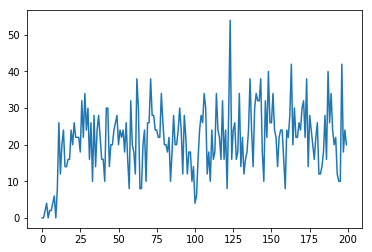

In [16]:
episode_results = resultats.groupby("episode").sum()
size_widow = 50
np_points = len(episode_results)//size_widow
res = []

for i in range(np_points):
    res.append(np.mean(episode_results.reward[size_widow*i:size_widow*(i+1)]))

index = [i for i in range(np_points)]
               
plt.plot(res)
plt.show()

In [10]:
evaluation = pd.DataFrame(columns=['episode','step','done','reward','observation'])
env = gym.make(env_name)
observation = env.reset()
nb_episode = 50

# Boucle d’apprentissage (exploration mode)
for episode in range(nb_episode):
    done = False
    while not done:
        
        # Renvoyer une sortie
        # env.render() 
        
        # Choisir une action avec une politique epsilon_greedy
        action = epsilon_greedy_policy(Q, 0, env, observation)
        
        # L'envoyer à l'environnement et récupérer la réponse
        observation, reward, done, info = env.step(action)
        
        evaluation = evaluation.append({'episode': episode,
                                        'step' : step,
                                        'done' : done,
                                        'reward' : reward,
                                        'observation':observation}, ignore_index=True)
                

    if done:
        observation = env.reset()
env.close()

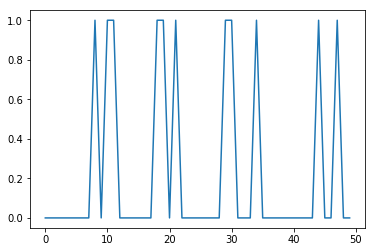

In [11]:
episode_results = evaluation.groupby("episode").sum()
               
plt.plot(episode_results.index, episode_results.reward)
plt.show()